In [2]:
import pandas as pd

df_slr = pd.read_csv('observed-change-in-global-mean-3.csv')
df_slr

,Year:year,"Global mean sea level (reconstruction, CSIRO):number",Uncertainty range 1 (mm):number,Uncertainty high CW:number,Uncertainty low CW:number,"Global mean sea level (reconstruction, DMW):number",Uncertainty range 2 (mm):number,Uncertainty high D:number,Uncertainty low D:number,"Global mean sea level (satellite altimeter, CMEMS) :number"
0,1880,-192.35,24.2,-168.15,-216.55,NaN,NaN,NaN,NaN,NaN
1,1881,-186.75,24.2,-162.55,-210.95,NaN,NaN,NaN,NaN,NaN
2,1882,-203.55,23.0,-180.55,-226.55,NaN,NaN,NaN,NaN,NaN
3,1883,-198.25,22.8,-175.45,-221.05,NaN,NaN,NaN,NaN,NaN
4,1884,-177.35,22.2,-155.15,-199.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
134,2014,NaN,NaN,NaN,NaN,35.29,3.06,38.34,32.23,36.05
135,2015,NaN,NaN,NaN,NaN,40.35,3.22,43.57,37.13,44.87
136,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.75
137,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.43


In [3]:
df_slr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year:year                                                   139 non-null    int64  
 1   Global mean sea level (reconstruction, CSIRO):number        134 non-null    float64
 2   Uncertainty range 1 (mm):number                             134 non-null    float64
 3   Uncertainty high CW:number                                  134 non-null    float64
 4   Uncertainty low CW:number                                   134 non-null    float64
 5   Global mean sea level (reconstruction, DMW):number          116 non-null    float64
 6   Uncertainty range 2 (mm):number                             116 non-null    float64
 7   Uncertainty high D:number                                   116 non-null    float64
 8   

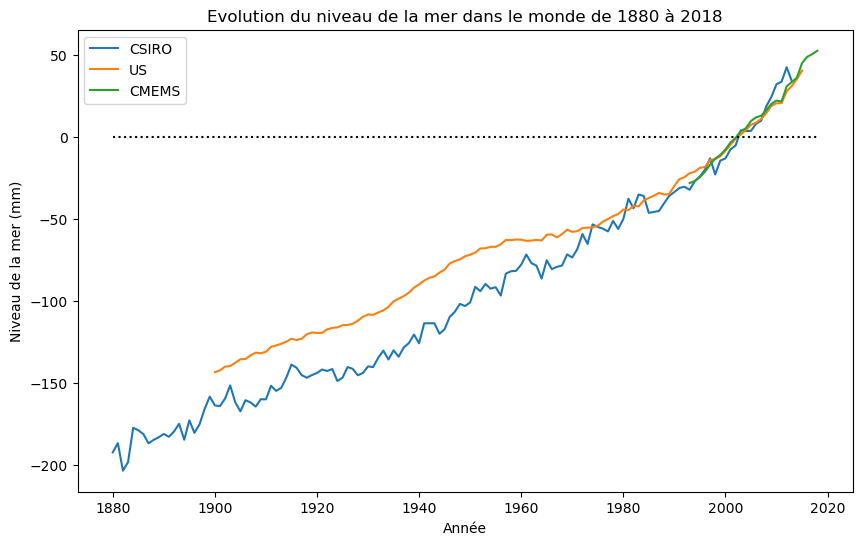

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

fig = plt.figure(figsize=(10,6))

ax = sns.lineplot(x='Year:year', y='Global mean sea level (reconstruction, CSIRO):number', ci=None, data=df_slr, label="CSIRO")
ax = sns.lineplot(x='Year:year', y='Global mean sea level (reconstruction, DMW):number', ci=None, data=df_slr, label="US")
ax = sns.lineplot(x='Year:year', y='Global mean sea level (satellite altimeter, CMEMS) :number', ci=None, data=df_slr, label="CMEMS")

ax = sns.lineplot(x='Year:year', y=0, data = df_slr, linestyle='dotted', color = 'black')

ax.set_title("Evolution du niveau de la mer dans le monde de 1880 à 2018")
ax.set_xlabel('Année')
ax.set_ylabel('Niveau de la mer (mm)');

In [ ]:
'''
Sources : https://www.eea.europa.eu/data-and-maps/daviz/observed-change-in-global-mean-3#tab-chart_4

Notes:

Le graphique illustre la montée du niveau de la mer de 1880 à 2018, en se basant sur trois sources :

- la ligne bleue représente une reconstruction (par satellites et altimètres), de 1880 à 2013, réalisée par l'organisme 
gouvernemental australien pour la recherche scientifique (CSIRO - Commonwealth Scientific and Industrial Research Organisation)
Source : https://doi.org/10.1007/s10712-011-9119-1

- la ligne orange illustre une reconstruction un peu plus récente, de 1900 à 2015, réalisée par l'Université de Siegen
Source : https://doi.org/10.1038/s41558-019-0531-8

- la ligne verte présente des données obtenues par des satellites altimétriques, entre 1993 et 2018. Cette étude a été menée
par le Service de Surveillance de l'Environnement Marin de Copernicus (CMEMS).

*** 

Ces trois graphiques illustrent bien l'élévation du niveau de la mer dans le monde depuis la fin du XIXe siècle ; phénomène
résultant du réchauffement climatique. 

'''

In [40]:
# Elevation du niveau de la mer - Moyenne sur dix ans selon le CMEMS

elevation_10_CMEMS = (df_slr.loc[138, "Global mean sea level (satellite altimeter, CMEMS) :number"])-(df_slr.loc[128, "Global mean sea level (satellite altimeter, CMEMS) :number"])
print("Elévation du niveau de la mer entre 2008 et 2018 selon le CMEMS :", "%.2f"%elevation_10_CMEMS, "mm")

Elévation du niveau de la mer entre 2008 et 2018 selon le CMEMS : 36.31 mm


In [27]:
# Estimation par an (CMEMS)

estimation = elevation_10_CMEMS/10
print("Rythme annuel estimé sur les dix dernières années selon le CMEMS :", "%.2f"%estimation, "mm")

Rythme annuel estimé sur les dix dernières années selon le CMEMS : 3.63 mm


In [36]:
# Rythme entre 1900 et 2010 (CSIRO)

# 1900 : df_slr.iloc[20]
# 2010 : df_slr.iloc[130]

elevation_110_CSIRO = (df_slr.loc[130, "Global mean sea level (reconstruction, CSIRO):number"])-(df_slr.loc[20, "Global mean sea level (reconstruction, CSIRO):number"])
print("Elévation du niveau de la mer entre  1900 et 2010 selon le CSIRO :", "%.2f"%elevation_110_CSIRO, "mm")
print("Elévation du niveau de la mer entre  1900 et 2010 selon le CSIRO :", "%.2f"%(elevation_110_CSIRO*0.001), "m")

Elévation du niveau de la mer entre  1900 et 2010 selon le CSIRO : 195.80 mm
Elévation du niveau de la mer entre  1900 et 2010 selon le CSIRO : 0.20 m


In [41]:
# Rythme entre 1980 et 2010 (CSIRO)

elevation_1980_CSIRO = (df_slr.loc[130, "Global mean sea level (reconstruction, CSIRO):number"])-(df_slr.loc[100, "Global mean sea level (reconstruction, CSIRO):number"])
print("Elévation du niveau de la mer entre 1980 et 2010 selon le CSIRO :", "%.2f"%elevation_1980_CSIRO, "mm")
print("Elévation du niveau de la mer entre 1980 et 2010 selon le CSIRO :", "%.2f"%(elevation_1980_CSIRO*0.001), "m")

# Pas tout a fait la moitié

Elévation du niveau de la mer entre 1980 et 2010 selon le CSIRO : 82.20 mm
Elévation du niveau de la mer entre 1980 et 2010 selon le CSIRO : 0.08 m


In [50]:
# Rythme entre 1901 et 1971 (CSIRO)

elevation_1971_CSIRO = (df_slr.loc[91, "Global mean sea level (reconstruction, CSIRO):number"])-(df_slr.loc[21, "Global mean sea level (reconstruction, CSIRO):number"])
print("Elévation du niveau de la mer entre 1901 et 1971 selon le CSIRO :", "%.2f"%elevation_1971_CSIRO, "mm")
print("Elévation du niveau de la mer par an entre 1901 et 1971 selon le CSIRO :", "%.2f"%(elevation_1971_CSIRO/70), "mm")

Elévation du niveau de la mer entre 1901 et 1971 selon le CSIRO : 95.80 mm
Elévation du niveau de la mer par an entre 1901 et 1971 selon le CSIRO : 1.37 mm


In [55]:
# Rythme entre 1971 et 2006 (CSIRO)

elevation_2006_CSIRO = (df_slr.loc[126, "Global mean sea level (reconstruction, CSIRO):number"])-(df_slr.loc[91, "Global mean sea level (reconstruction, CSIRO):number"])
print("Elévation du niveau de la mer entre 1971 et 2006 selon le CSIRO :", "%.2f"%elevation_2006_CSIRO, "mm")
print("Elévation du niveau de la mer par an entre 1971 et 2006 selon le CSIRO :", "%.2f"%(elevation_2006_CSIRO/35), "mm")

Elévation du niveau de la mer entre 1971 et 2006 selon le CSIRO : 76.30 mm
Elévation du niveau de la mer par an entre 1971 et 2006 selon le CSIRO : 2.18 mm


In [ ]:
'''
Selon la synthèse du GIEC publiée en 2021, le niveau de la mer a augmenté de 0,20 m entre 1901 et 2018.
L'augmentation du niveau de la mer est de 20 cm entre 1901 et 2018. La moitié de cette hausse étant observée après 1980. 

Le rythme d'augmentation du niveau des océans est de :
- 1,3 mm/an entre 1901 et 1971, 
- 1,9 mm/an entre 1971 et 2006,
- 3,7 mm/an entre 2006 et 2018.

Le rythme annuel, en 2020, est estimé à plus de 3,5 mm par an.

'''

In [ ]:
'''
Corrélations
'''

In [57]:
# Dataset

df = pd.read_csv('df_chgm_clmt_final.csv')
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,...,N[2]*O,"Global mean sea level (reconstruction, CSIRO):number",Uncertainty range 1 (mm):number,Uncertainty high CW:number,Uncertainty low CW:number,"Global mean sea level (reconstruction, DMW):number",Uncertainty range 2 (mm):number,Uncertainty high D:number,Uncertainty low D:number,"Global mean sea level (satellite altimeter, CMEMS) :number"
0,1880,-0.17,-0.29,-0.04,-0.37,-0.12,-0.02,-0.80,-0.48,-0.29,...,1.846730,-192.35,24.2,-168.15,-216.55,NaN,NaN,NaN,NaN,NaN
1,1881,-0.08,-0.18,0.01,-0.35,0.11,-0.07,-0.91,-0.43,-0.21,...,1.867070,-186.75,24.2,-162.55,-210.95,NaN,NaN,NaN,NaN,NaN
2,1882,-0.11,-0.22,-0.01,-0.31,-0.04,0.01,-1.41,-0.26,-0.17,...,1.884569,-203.55,23.0,-180.55,-226.55,NaN,NaN,NaN,NaN,NaN
3,1883,-0.17,-0.29,-0.06,-0.35,-0.16,-0.01,-0.19,-0.54,-0.28,...,1.899797,-198.25,22.8,-175.45,-221.05,NaN,NaN,NaN,NaN,NaN
4,1884,-0.28,-0.43,-0.14,-0.60,-0.14,-0.14,-1.30,-0.62,-0.48,...,1.913325,-177.35,22.2,-155.15,-199.55,NaN,NaN,NaN,NaN,NaN


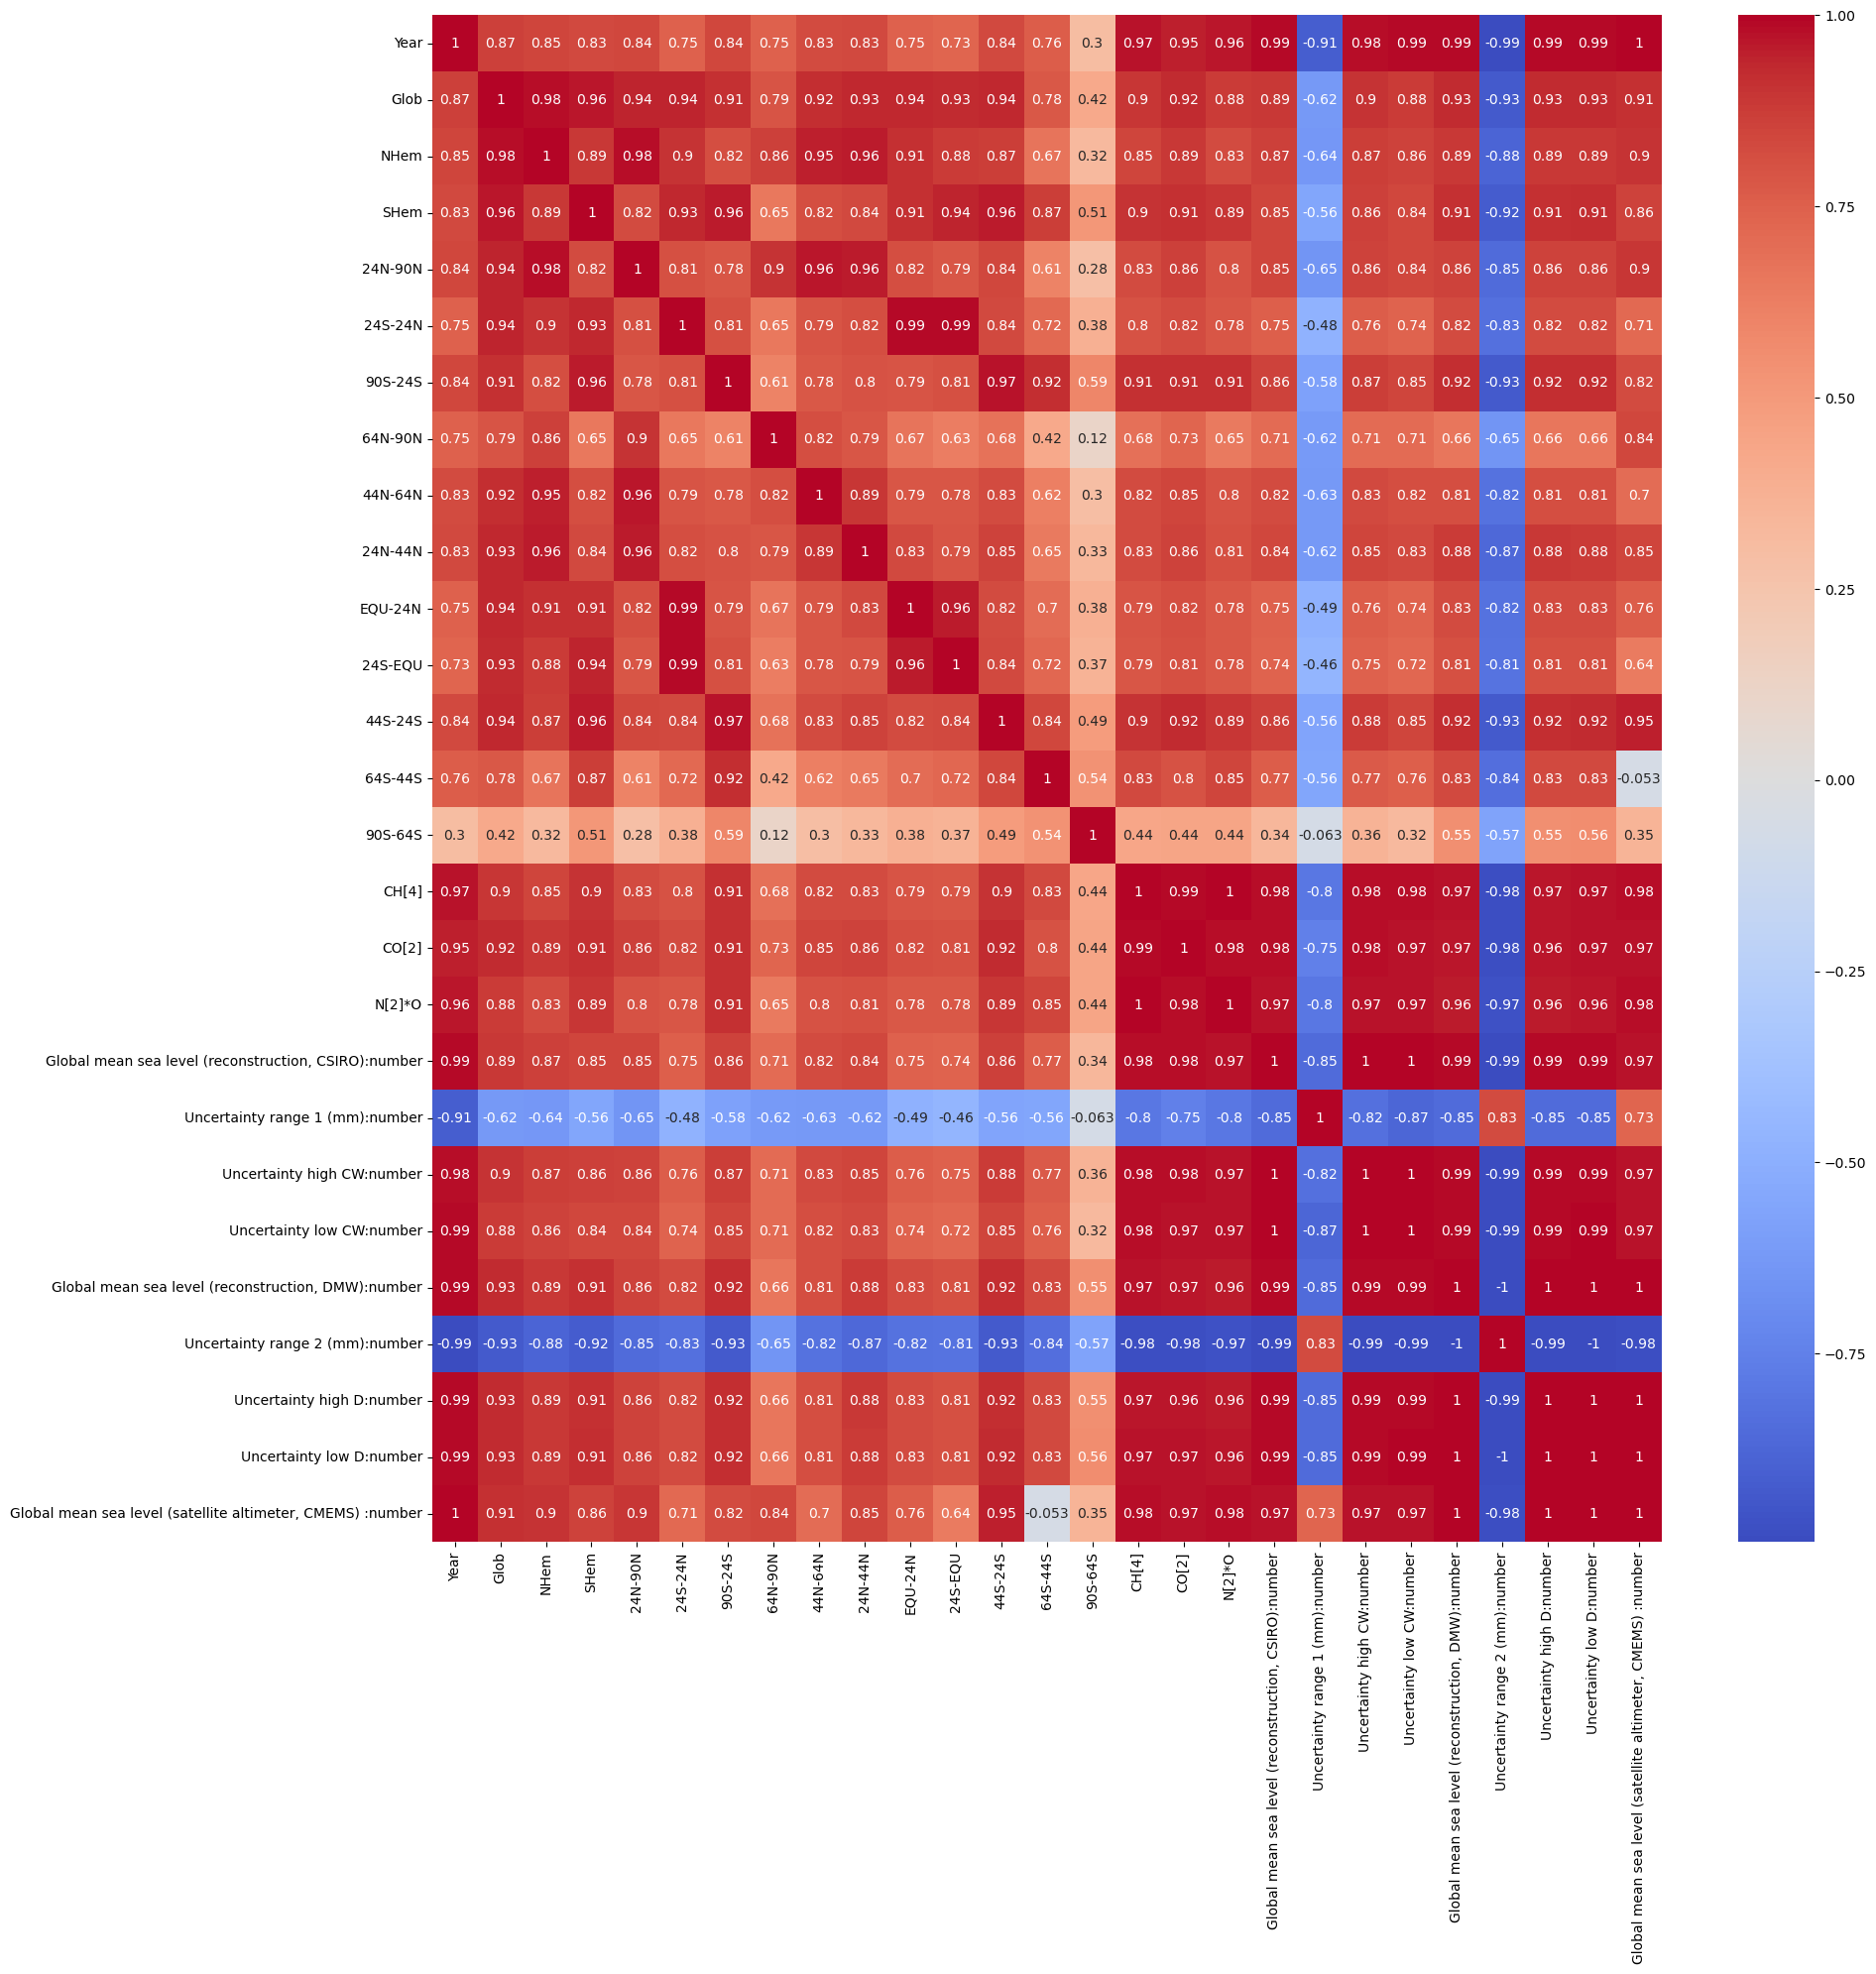

In [59]:
'''Affichage d'une heatmap des corrélations du DataFrame'''

cor = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');